#🐕 Examen Parcial

Rivermind es un programa de asistencia psicológica en línea promovido por la Embajada de la India, con el objetivo de fomentar la salud mental entre los trabajadores del sector público. La implementación del proyecto incluyó una evaluación inicial para estudiar los factores que motivaron el acceso al servicio.

#📑Libro de códigos:

| Variable                | Tipo                 | Descripción                                                                 |
|-------------------------|----------------------|------------------------------------------------------------------------------|
| Edad                    | Numérica continua    | Edad del usuario                                                            |
| Deudas_previas          | Binaria              | Indica si el usuario tuvo deudas médicas previas          |
| Tiene_seguro            | Binaria              | Indica si cuenta con algún tipo de seguro de salud                         |
| Servicios_salud_mental  | Binaria              | Ha hecho uso previo de servicios de salud mental                           |
| Apoyo_familiar          | Ordinal              | Nivel de apoyo familiar percibido            |
| Terapia                 | Binaria              | Participa actualmente en terapia psicológica              |
| Empleo_loca             | Numérica continua    | Índice del empleo laboral local                                           |
| Stress                  | Numérica continua    | Nivel reportado de estrés general                                          |
| Confianza_usuario       | Ordinal              | Nivel de confianza del usuario en el sistema de salud                      |
| Costo_vida              | Numérica continua    | Costo estimado de vida en la zona                                          |
| Calidad_salud           | Categórica ordinal   | Percepción de calidad del sistema de salud local                           |
| Acceso_servicio         | Binaria              | Indica si accedió a servicios de telesalud mental         |
| Depression              | Numérica continua    | Nivel estimado de síntomas depresivos                                      |
| Estado_civil_casado     | Nominal              | Estado Civil |


## Librerias

In [1]:
# Data Processing
import pandas as pd
import numpy as np
import os
# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

## Cargo de datos

In [2]:
# ID del archivo desde el enlace de Google Drive
file_id = '1kYoe-at3taX9nhRU4QTk6MsQBnaeKP-D'
# URL directa para cargar el archivo
drive_url = f'https://drive.google.com/uc?id={file_id}'

# Leer el archivo CSV, usando ',' como separador
df = pd.read_csv(drive_url, delimiter=',')

# Mostrar las primeras filas
print("Head of the DataFrame:")
print(df.head())

# Mostrar dimensiones del DataFrame
print("\nNumber of cases (rows) and variables (columns):")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")


Head of the DataFrame:
   Edad  Deudas_previas  Tiene_seguro  Servicios_salud_mental  Apoyo_familiar  \
0    31               0             0                       1               2   
1    62               0             1                       0               2   
2    47               0             1                       0               2   
3    48               0             0                       0               2   
4    31               0             1                       0               3   

   Terapia  Empleo_loca  Stress  Confianza_usuario  Costo_vida  Calidad_salud  \
0        0         -1.1   4.767              -50.8       1.048              1   
1        0         -1.1   4.767              -50.8       1.031              1   
2        1         -1.7   4.027              -38.3       0.904              2   
3        0         -1.7   4.027              -38.3       0.904              2   
4        0         -1.1   4.767              -50.8       1.048              1   

   

## Limpieza y formato de los datos

In [3]:
# Descriptive statistics for the new dataset
print("\nDescriptive Statistics of the DataFrame:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check data types
print("\nData types of columns:")
print(df.dtypes)


Descriptive Statistics of the DataFrame:
               Edad  Deudas_previas  Tiene_seguro  Servicios_salud_mental  \
count   41188.00000    41188.000000  41188.000000            41188.000000   
unique          NaN             NaN           NaN                     NaN   
top             NaN             NaN           NaN                     NaN   
freq            NaN             NaN           NaN                     NaN   
mean       40.02406        0.000073      0.523842                0.151695   
std        10.42125        0.008534      0.499437                0.358729   
min        17.00000        0.000000      0.000000                0.000000   
25%        32.00000        0.000000      0.000000                0.000000   
50%        38.00000        0.000000      1.000000                0.000000   
75%        47.00000        0.000000      1.000000                0.000000   
max        98.00000        1.000000      1.000000                1.000000   

        Apoyo_familiar       Tera

## Dividir train y test

In [5]:
selected_columns = ['Edad', 'Costo_vida', 'Calidad_salud', 'Apoyo_familiar', 'Confianza_usuario', 'Empleo_loca', 'Tiene_seguro','Acceso_servicio']
df_mini= df[selected_columns]

# Display the first few rows of the new DataFrame
print("\nDataFrame with selected columns:")
print(df_mini.head())

# Display dimensions of the new DataFrame
print("\nNumber of cases (rows) and selected variables (columns):")
print(f"Rows: {df_mini.shape[0]}")
print(f"Columns: {df_mini.shape[1]}")


DataFrame with selected columns:
   Edad  Costo_vida  Calidad_salud  Apoyo_familiar  Confianza_usuario  \
0    31       1.048              1               2              -50.8   
1    62       1.031              1               2              -50.8   
2    47       0.904              2               2              -38.3   
3    48       0.904              2               2              -38.3   
4    31       1.048              1               3              -50.8   

   Empleo_loca  Tiene_seguro  Acceso_servicio  
0         -1.1             0                0  
1         -1.1             1                1  
2         -1.7             1                0  
3         -1.7             0                1  
4         -1.1             1                1  

Number of cases (rows) and selected variables (columns):
Rows: 41188
Columns: 8


In [6]:
# Split the data into features (X) and target (y)
X = df_mini.drop('Acceso_servicio', axis=1)
#X = df.drop('Acceso_servicio','Depression', axis=1)
Y = df_mini['Acceso_servicio']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

#🌳 Árboles de decisión

In [7]:
model1 = DecisionTreeClassifier(max_depth=3, random_state=42)
model1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

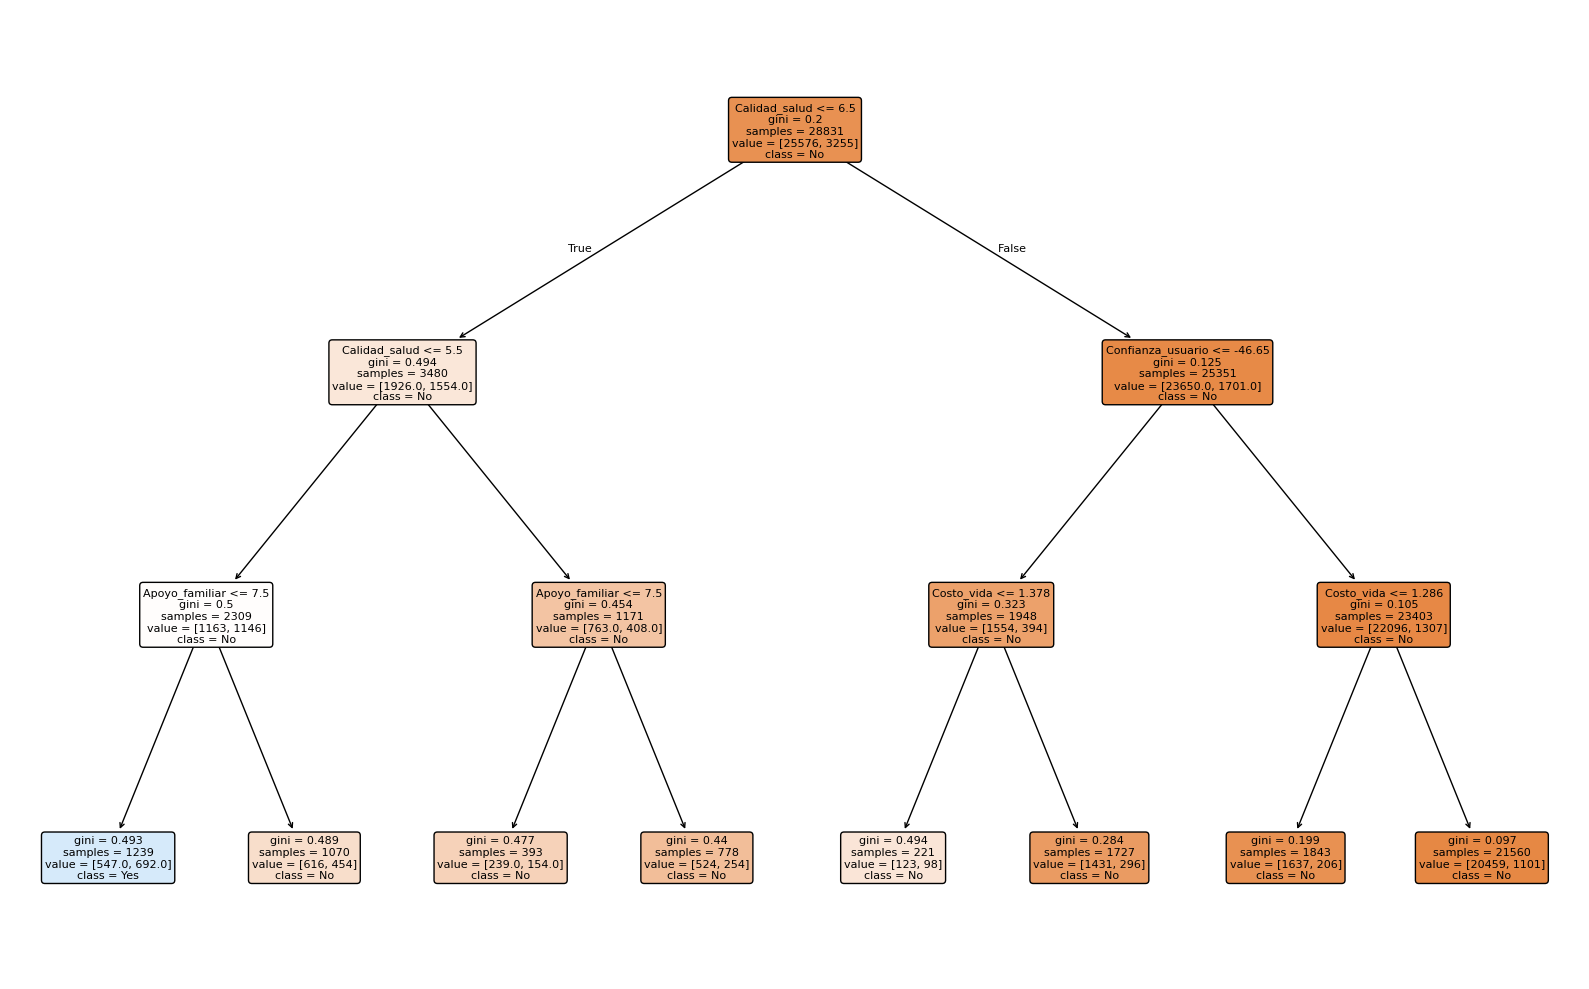

In [8]:
plt.figure(figsize=(16, 10))  # Ajusta a un tamaño más compacto que 12x8 si quieres cajas más juntas
plot_tree(
    model1,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,             # Cajas redondeadas
    fontsize=8                # Tamaño de fuente más legible
)

plt.tight_layout()            # Ajusta los márgenes automáticamente
plt.show()

# 🌳Random forest

In [9]:
model2 = RandomForestClassifier()
model2.fit(X_train, Y_train)

RandomForestClassifier()

In [12]:
# Export the first three decision trees from the forest
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

NameError: name 'rf' is not defined

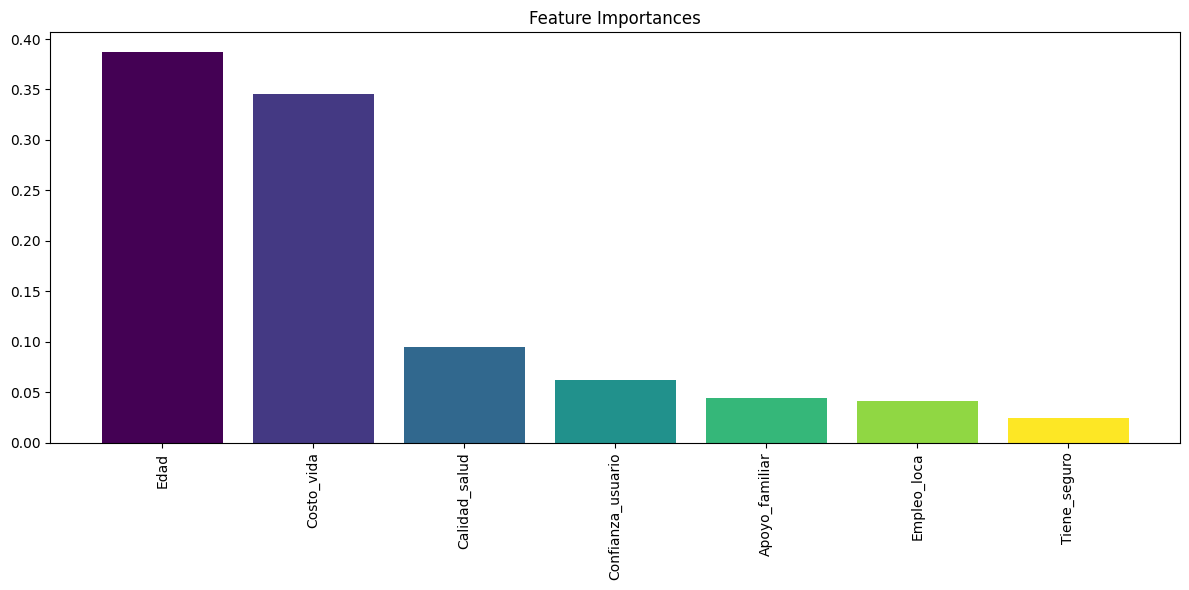

In [ ]:
# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
feature_names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")

# Define a list of colors, one for each bar. You can customize this list.
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_names)))

# Plot the bars with different colors
plt.bar(range(X_train.shape[1]), importances[indices], color=colors)

plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
plt.tight_layout()
plt.show()

#Comparando los modelos

In [ ]:
Y_pred1 = model1.predict(X_test)
Y_pred2 = model2.predict(X_test)
accuracy1 = accuracy_score(Y_test, Y_pred1)
accuracy2 = accuracy_score(Y_test, Y_pred2)
recall1 = recall_score(Y_test, Y_pred1)
recall2 = recall_score(Y_test, Y_pred2)
precision2 = precision_score(Y_test, Y_pred2)
precision1 = precision_score(Y_test, Y_pred1)

In [ ]:
import pandas as pd
# Create a list of tuples with the metrics
metrics_data = [
    ("Accuracy", accuracy1, accuracy2),
    ("Precision", precision1, precision2),
    ("Recall", recall1, recall2)
]

# Create a pandas DataFrame
df_metrics = pd.DataFrame(metrics_data, columns=["Metric", "Decision Tree", "Random Forest"])

# Print the DataFrame as a formatted table
print("Model Metrics:")
print(df_metrics.to_string(index=False))


Model Metrics:
   Metric  Decision Tree  Random Forest
 Accuracy       0.892692       0.878611
Precision       0.571698       0.443548
   Recall       0.216120       0.274608



Confusion Matrix for Decision Tree:


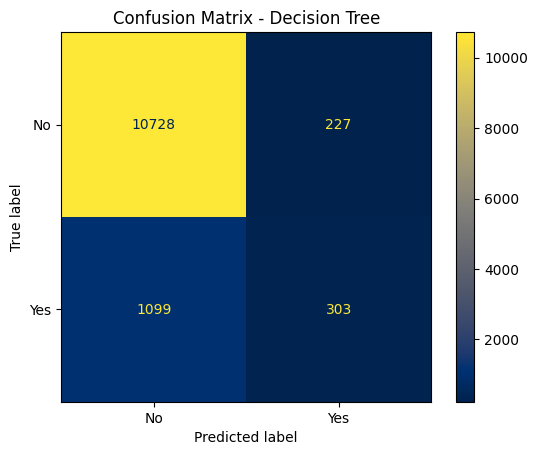


Confusion Matrix for Random Forest:


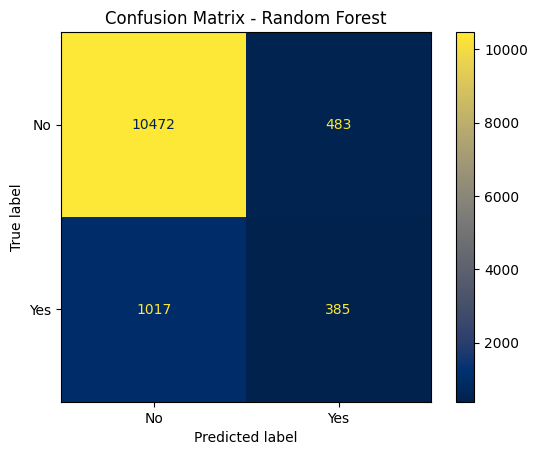

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Genera las matrices de confusión
conf_matrix1 = confusion_matrix(Y_test, Y_pred1)
conf_matrix2 = confusion_matrix(Y_test, Y_pred2)

# Mostrar matriz de confusión para Decision Tree
print("\nConfusion Matrix for Decision Tree:")
disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1, display_labels=["No", "Yes"])
fig1, ax1 = plt.subplots()
disp1.plot(ax=ax1, cmap='cividis', values_format='d')  # 'd' evita notación científica
ax1.set_title("Confusion Matrix - Decision Tree")
plt.show()

# Mostrar matriz de confusión para Random Forest
print("\nConfusion Matrix for Random Forest:")
disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix2, display_labels=["No", "Yes"])
fig2, ax2 = plt.subplots()
disp2.plot(ax=ax2, cmap='cividis', values_format='d')  # 'd' evita notación científica
ax2.set_title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, 'o-', label='Precisión en Entrenamiento')
    plt.plot(train_sizes, test_mean, 'o--', label='Precisión en Validación')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

    plt.title(title)
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Precisión')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

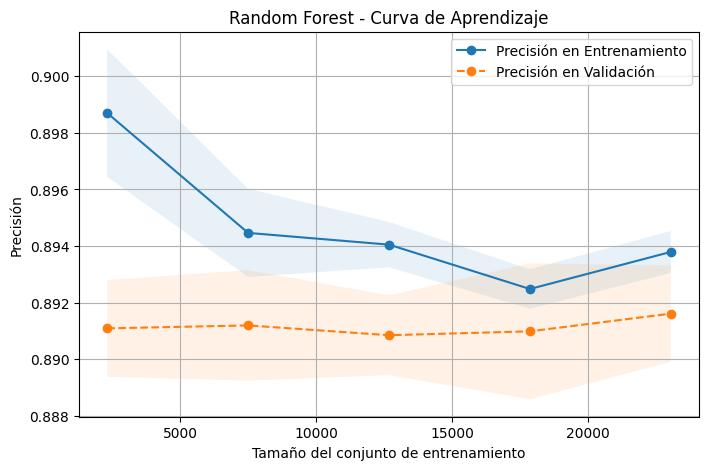

In [ ]:
plot_learning_curve(model1, X_train, Y_train, 'Random Forest - Curva de Aprendizaje')

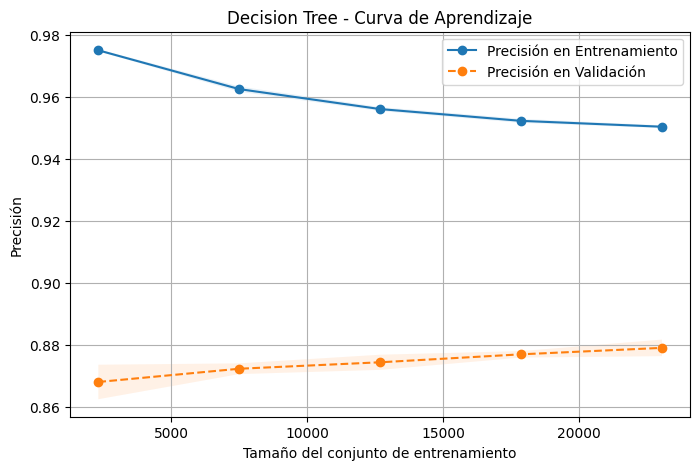

In [ ]:
plot_learning_curve(model2, X_train, Y_train, 'Decision Tree - Curva de Aprendizaje')

🙊

In [ ]:
#folder_path = '/content/drive/MyDrive/[09] Docencia/2025-1/Phyton - 1INT47/Parcial' # Replace 'Your Folder Name' with the actual folder name from the link, which seems to be implied by the folder ID. If you don't have a specific folder name for the ID, you might need to adjust the path or use the folder ID directly if the API supports it for writing. For simplicity here, we'll assume you want to save it in a folder you can identify.
#file_name = 'Rivermind6.csv' # Replace with the desired file name, perhaps similar to the original file
#output_path = os.path.join(folder_path, file_name)#Construct the full file path
#folder_path = '/content/drive/MyDrive/[09] Docencia/2025-1/Phyton - 1INT47/Parcial' #Specify the folder path and the file name
#file_name = 'Rivermind6.csv' # Replace with the desired file name, perhaps similar to the original file
#output_path = os.path.join(folder_path, file_name) #full path
#df.to_csv(output_path, index=False) # Using index=False prevents pandas from writing the DataFrame index as a column
#print(f"\nDataFrame saved to: {output_path}")


* 1 - Elegir entre 2 modelos según reusltados de accuracy recall
* 2- indiqué que transofrmaciones fueron necesarias hacer
* 3- arbol de decisión intrepretación
* 4- Procesos de random forest
* 5- Cross validation
* 6- Sensibilidad  matriz de confusión
* 7- Resultado  